In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [112]:
course_information = pd.read_csv('course_information.csv')
course_posts = pd.read_csv('course_posts.csv')
course_threads = pd.read_csv('course_threads.csv')

In [113]:
merged = pd.merge(course_information, course_posts, on = 'course_id')
merged.columns

Index(['name', 'course_id', 'weeks', 'hours', 'start_date', 'end_date', 'type',
       'language', 'num_threads', 'mandatory_posts', 'num_users', 'post_id',
       'thread_id', 'parent_id', 'order', 'user_id', 'user_type', 'post_time',
       'relative_t', 'votes', 'num_words', 'forum_id'],
      dtype='object')

In [114]:
combined = pd.merge(merged, course_threads, on = ['course_id', 'thread_id'])
combined.columns

Index(['name', 'course_id', 'weeks', 'hours', 'start_date', 'end_date', 'type',
       'language', 'num_threads', 'mandatory_posts', 'num_users', 'post_id',
       'thread_id', 'parent_id', 'order', 'user_id', 'user_type', 'post_time',
       'relative_t', 'votes', 'num_words', 'forum_id_x', 'og_forum',
       'og_forum_id', 'parent_forum', 'parent_forum_id', 'forum_chain',
       'depth', 'num_views', 'num_tags', 'forum_id_y'],
      dtype='object')

In [115]:
working_df = combined
working_df[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,forum_id_x,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id_y
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,13,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,13,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
2,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,13,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
3,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,13,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
4,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,13,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13


In [116]:
# Calculating the number of posts and number of comments

working_df['is_post'] = working_df.parent_id==0
working_df_threads = working_df.groupby([ 'thread_id', 'is_post','user_id']).count()[['post_id']].reset_index()
working_df_threads['num_posts'] = 0
working_df_threads.loc[working_df_threads.is_post == True, 'num_posts'] = working_df_threads['post_id']
working_df_threads['num_comments'] = 0

working_df_threads.loc[working_df_threads.is_post==False, 'num_comments'] = working_df_threads['post_id']
working_df_threads.drop('is_post', axis=1, inplace=True)
working_df_threads[:5]


,thread_id,user_id,post_id,num_posts,num_comments
0,1,0,102,0,102
1,1,8690000,1,0,1
2,1,9756462,1,0,1
3,1,10584092,1,0,1
4,1,27503817,1,0,1


In [117]:
#checking the datatypes
working_df_threads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500210 entries, 0 to 500209
Data columns (total 5 columns):
thread_id       500210 non-null int64
user_id         500210 non-null int64
post_id         500210 non-null int64
num_posts       500210 non-null int64
num_comments    500210 non-null int64
dtypes: int64(5)
memory usage: 19.1 MB


In [118]:
#checking if the dataframe has null values
working_df_threads.isnull().sum()

thread_id       0
user_id         0
post_id         0
num_posts       0
num_comments    0
dtype: int64

# Feature 1, 2, 4

* Number of posts (np): number of posts in a thread.
* Number of comments (nc): number of Comments in a thread
* Index Max Breadth (Imaxb)  (post_id column name)

In [119]:
working_df_threads_num_posts = working_df_threads.groupby(['thread_id']).max().reset_index()
working_df_threads_num_posts[:5]

,thread_id,user_id,post_id,num_posts,num_comments
0,1,9999983827,102,89,102
1,2,9997907744,74,66,74
2,3,9998847328,122,122,67
3,4,9991082562,60,60,55
4,5,9994010262,63,63,56


Text(0.5, 1.0, 'Scatter plot showing relationship between Number of comments and number of posts for Assignments and Study Group')

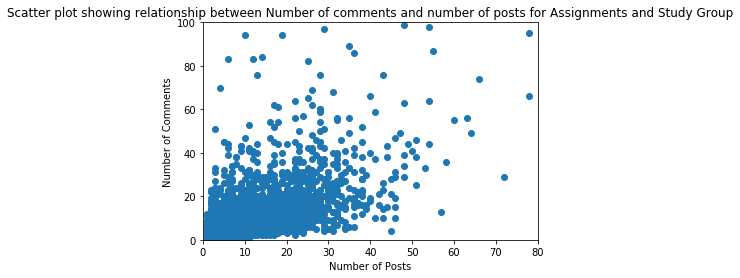

In [120]:
# relationship between variables

plt.scatter('num_posts', 'num_comments',data=working_df_threads_num_posts)
plt.xlim(0,80)
plt.ylim(0,100)
plt.xlabel("Number of Posts")
plt.ylabel("Number of Comments")
plt.title("Scatter plot showing relationship between Number of comments and number of posts for Assignments and Study Group")

# Feature 3

* Maximum breadth

In [121]:
working_df_threads[:5]

,thread_id,user_id,post_id,num_posts,num_comments
0,1,0,102,0,102
1,1,8690000,1,0,1
2,1,9756462,1,0,1
3,1,10584092,1,0,1
4,1,27503817,1,0,1


In [122]:
working_df_threads_feature = working_df_threads.groupby(['thread_id']).nunique()[['user_id']]
working_df_threads_feature.rename(columns={'thread_id': 'thread_id', 'user_id': 'bmax'}, inplace=True)
working_df_threads_feature[:5]

,bmax
thread_id,
1,3309
2,2653
3,3111
4,1210
5,2132


In [123]:
#creating dataframe consisting of all 3 features


working_df_threads_3 = working_df_threads_num_posts.merge(working_df_threads_feature, on = 'thread_id')
working_df_threads_3.drop('user_id', axis=1, inplace=True)
working_df_threads_3.rename(columns={'post_id': 'index_bmax'}, inplace=True)
working_df_threads_3[:5]

,thread_id,index_bmax,num_posts,num_comments,bmax
0,1,102,89,102,3309
1,2,74,66,74,2653
2,3,122,122,67,3111
3,4,60,60,55,1210
4,5,63,63,56,2132
